In [1]:
import glob
import tifffile
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import *
#from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
from os import listdir
from os.path import isfile, join
from sklearn.manifold import TSNE

import re
%matplotlib notebook

# Load Labels/Import 

In [2]:
python_data_path= r"Y:\coskun-lab\Shambavi\Paper\Data\Main Data\Python Data"
results_store_path = r"Y:\coskun-lab\Shambavi\Paper\Results"

In [3]:
python_data_path= r"Y:\coskun-lab\Shambavi\Paper\Data\Main Data\Python Data"
os.chdir(python_data_path)

In [4]:
pv = np.load('pixel_in_zero.npy',allow_pickle=True)
px = np.load('pixel_in_zero_x.npy',allow_pickle=True)
py = np.load('pixel_in_zero_y.npy',allow_pickle=True)
pz = np.load('pixel_in_zero_z.npy',allow_pickle=True)

In [234]:
pv_count = np.load('pixel_in_nonzero.npy',allow_pickle=True)
px_count = np.load('pixel_in_nonzero_x.npy',allow_pickle=True)
py_count = np.load('pixel_in_nonzero_y.npy',allow_pickle=True)
pz_count = np.load('pixel_in_nonzero_z.npy',allow_pickle=True)

In [5]:

labels = np.load('in_germinal_labels.npy',allow_pickle=True)

In [236]:
for i,type in enumerate(labels):
    print(i,type)

0 total
1 rest
2 63.5783
3 384.718
4 1
5 C_3H_8S_2O_4As_3-
6 C_10F_15-
7 Ca_7F_7-
8 E
9 HO_2Al_7F_11-
10 436.73
11 H_19O_5Al_11F_3-
12 Au_2SN_2H_5-
13 C_3H_2N_2-
14 468.907
15 474.994
16 479.897
17 Au_2Cl_3-
18 501.91
19 Si_3C_21H_49O_8-
20 520.791
21 529.955
22 544.986
23 553.915
24 72.9484
25 570.99
26 586.834
27 593.993
28 610.801
29 73.9818
30 CHSNO-
31 C_2OK-
32 PO_3-
33 SiH_9N_3-
34 SO_3-
35 frag
36 H-
37 SO_4-
38 96.8653
39 PO_4-
40 106.839
41 CHSOV-
42 S_2O_3-
43 116.865
44 117.821
45 120.853
46 121.875
47 CH-
48 123.863
49 Si_3H_3SN-
50 SiH_2SN_4O-
51 Si_2C_3O_3-
52 CH_3SNO_5-
53 Si_3C_2H_3O_2-
54 143.892
55 144.83
56 SiCH_5SN_4O-
57 SiC_6O_3-
58 O-
59 149.871
60 H_2O_5FAl_2-
61 155.831
62 H_3O_8Al-
63 158.795
64 H_4O_3Al_4-
65 H_2O_3Al_2F_3-
66 C_9H_9Ti-
67 C_3H_3O_6Si-
68 H_3OAl_4F_2-
69 OH-
70 O_4F_4Al-
71 ^168Er-
72 C_11H_23O-
73 C_12H_22-
74 SiC_4H_6Al_2Cl-
75 O_2AlF_6-
76 180.731
77 head
78 192.815
79 H_11O_5Al_4-
80 Cl-
81 200.701
82 207.663
83 208.78
84 H_7O_2Al_3F_5-


# Select Compounds

In [6]:
#print("Zeros in layer {}: {}".format(k, zeros/(w*h)))
c1 = 102 #C3N
c2 = 113 #CsWO
c3 = 46 #121.87
c4 = 55 #144.83
X = pd.DataFrame({'C1': list(pv[c1]), 'C2': list(pv[c2]),'C3': list(pv[c3]),'C4' : list(pv[c4])})#,'Column4': x_count, 'Column5': y_count,'Column6': z_count})

In [238]:
# #print("Zeros in layer {}: {}".format(k, zeros/(w*h)))
# c1 = 26 #Cl-
# c2 = 41 #42
# c3 = 93 #CHSNO
# c4 = 75 #SO3
# X = pd.DataFrame({'C1': list(pv[c1]), 'C2': list(pv[c2]),'C3': list(pv[c3]),'C4' : list(pv[c4])})#,'Column4': x_count, 'Column5': y_count,'Column6': z_count})

In [7]:
def mean_pixel(pv):
    i = 1
    final = np.zeros([len(pv),256*256,int(len(pv[i,:])/(256*256))])
    for i in range(len(pv)):
        y = np.split(pv[i,:],len(pv[i,:])/(256*256))
        for j in range(int(len(pv[i,:])/(256*256))):
            final[i,:,j] = y[j]
    final_mean = np.mean(final, axis = 2)
    return final_mean

In [8]:
n_slices = 152

In [11]:
def recon_image(pixel_in_mean,n_slices):
    image = np.zeros([256,256,n_slices])
    for i in range(len(pixel_in_mean)):
        image[:,:,i] = pixel_in_mean[i,:].reshape((256,256))
    return image

In [12]:
pixel_in_mean = mean_pixel(pv)
mean_images = recon_image(pixel_in_mean,152)

In [13]:
os.chdir(results_store_path)

In [14]:
pwd

'Y:\\coskun-lab\\Shambavi\\Paper\\Results'

# Plot Compounds in 2D 

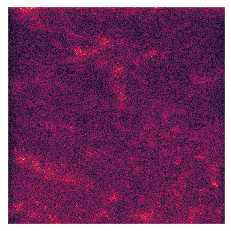

In [35]:
from pylab import figure, cm
from matplotlib.colors import LogNorm
from matplotlib import colors, cm, pyplot as plt




fig = plt.figure()
ax = plt.subplot()
#plt.imshow(mean_images[:,:,c4]) 

# C = some matrix
#im = ax.matshow(mean_images[:,:,c4], norm=LogNorm(vmin=0.01, vmax=1))
#t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
#f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
#f.show()
#ax.grid(False)
number = c2

# import cv2
# normalized_image = cv2.normalize(mean_images[:,:,number], None, 0, 255, cv2.NORM_MINMAX)#, dtype = cv2.CV_8U)
#plt.imshow(normalized_image)

# Apply log transform. 
number = 50
c = 255/(np.log(1 + np.max(mean_images[:,:,number]))) 
log_transformed = c * np.log(1 + mean_images[:,:,number]) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8)

plt.imshow(log_transformed)

#norm = colors.LogNorm(mean_images[:,:,number].ravel().min(),mean_images[:,:,number].ravel().max())#.mean() + 0.5 * mean_images[:,:,number].std())#, mean_images[:,:,number].max())
#plt.imshow(mean_images[:,:,number])

# Now set color to white (or whatever is "invisible")
ax.grid(False)

plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig('50_in.jpg')


In [19]:
from PIL import Image, ImageEnhance
enhancer = ImageEnhance.Contrast( mean_images[:,:,c2])
enhanced_im = enhancer.enhance(4.0)

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

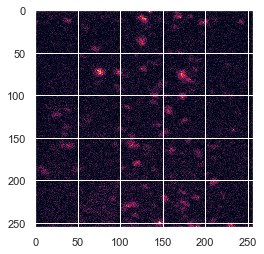

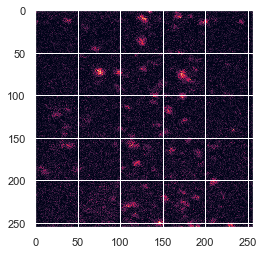

In [18]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
   
# Read an image 
image = mean_images[:,:,c2]
   
# Apply log transformation method 
c = 255 / np.log(1 + np.max(image)) 
c
log_image = c * (np.log(image + 1)) 
   
# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
   
fig = plt.figure()
# Display both images 
plt.imshow(image) 
plt.show() 
plt.imshow(log_image) 
plt.show() 



# K-means 

In [10]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized) 
kmeans = KMeans(n_clusters=6, random_state=111)
kmeans.fit(X_normalized)
kmeans.labels_
kmeans_list = list(kmeans.labels_)
zeros_indices = [i for i, x in enumerate(kmeans_list) if x == 0]    
one_indices = [i for i, x in enumerate(kmeans_list) if x == 1]
two_indices = [i for i, x in enumerate(kmeans_list) if x == 2]
three_indices = [i for i, x in enumerate(kmeans_list) if x == 3]
four_indices = [i for i, x in enumerate(kmeans_list) if x == 4]
five_indices = [i for i, x in enumerate(kmeans_list) if x == 5]

In [11]:
c1_array = np.c_[px_count[c1],py_count[c1],pz_count[c1]]
c2_array = np.c_[px_count[c2],py_count[c2],pz_count[c2]]
c3_array = np.c_[px_count[c3],py_count[c3],pz_count[c3]]
c4_array = np.c_[px_count[c4],py_count[c4],pz_count[c4]]

In [12]:
def image_stack(onlyfiles,pv):
    final= []
    compounds = []
    for i in range(len(onlyfiles)):
        final = []
        y = np.split(pv[i,:],len(pv[i,:])/(256*256))
        for j in range(int(len(pv[i,:])/(256*256))):
            final.append(y[j].reshape(256,256))
        compounds.append(final)
    return compounds

In [16]:
os.chdir(results_store_path)

# Plot Compounds in 3D 

<IPython.core.display.Javascript object>


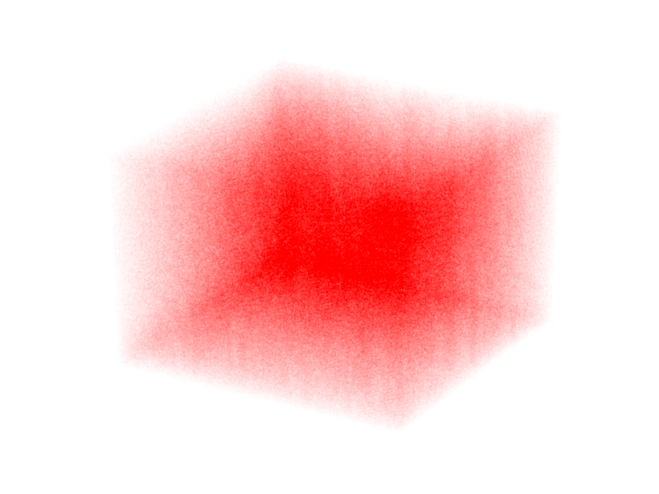

In [153]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c1],py_count[c1],pz_count[c1], c = 'red', s = 0.0007, alpha = 0.1)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C1_in.png", bbox_inches='tight')
plt.show()

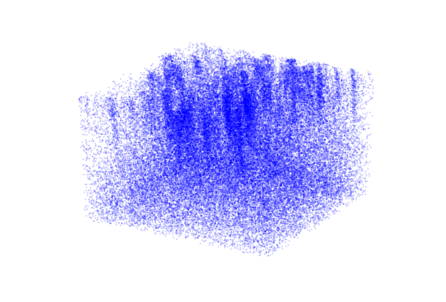

In [18]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c2],py_count[c2],pz_count[c2], c = 'blue', s = 1, alpha = 0.1)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C2_in.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


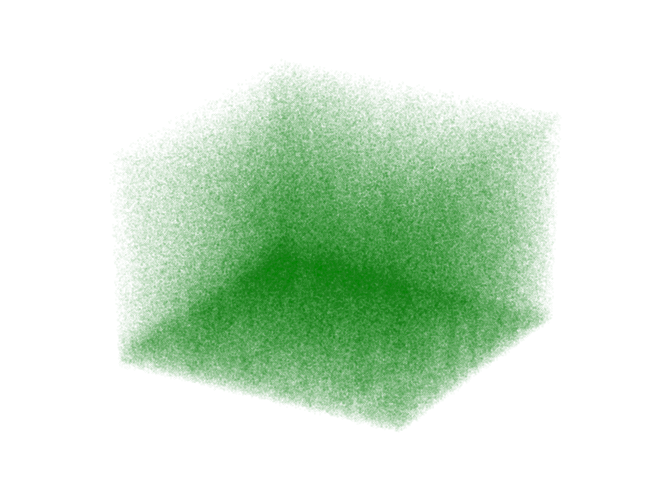

In [152]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c3],py_count[c3],pz_count[c3], c = 'green', s = 0.001, alpha = 0.5)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C3_in.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


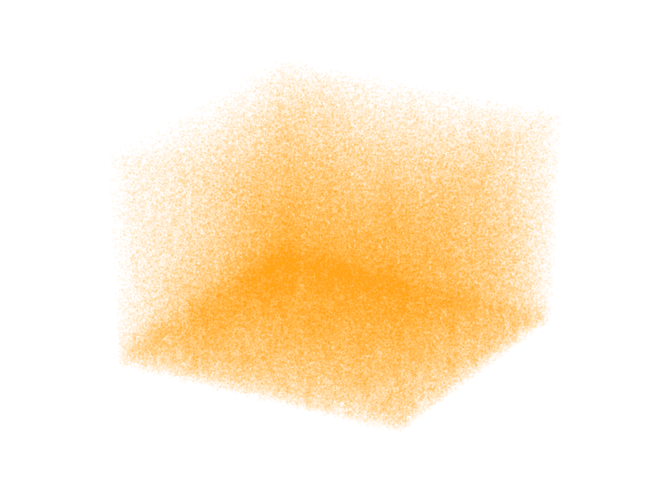

In [151]:
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter3D(px_count[c4],py_count[c4],pz_count[c4], c = 'orange', s = 0.001, alpha = 0.8)


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("C4_in.png", bbox_inches='tight')
plt.show()

In [21]:
def array_def(x_list,y_list,z_list,pixel,zeros_indices):
    T,W,V= [x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices]
    zero_array = np.c_[T,W,V]
    pixel = [pixel[i] for i in zeros_indices]
    zero_array_class = np.c_[zero_array,np.ones(len(zero_array))]
    return zero_array,zero_array_class,pixel

In [22]:
zero_array, zero_array_class,pixel_zero_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],zeros_indices)
one_array, one_array_class,pixel_one_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],one_indices)
two_array, two_array_class,pixel_two_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],two_indices)
three_array, three_array_class,pixel_three_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],three_indices)
four_array, four_array_class,pixel_four_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],four_indices)
five_array, five_array_class,pixel_five_c1 = array_def(px[c1],py[c1],pz[c1],pv[c1],five_indices)


In [23]:
zero_array, zero_array_class,pixel_zero_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],zeros_indices)
one_array, one_array_class,pixel_one_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],one_indices)
two_array, two_array_class,pixel_two_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],two_indices)
three_array, three_array_class,pixel_three_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],three_indices)
four_array, four_array_class,pixel_four_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],four_indices)
five_array, five_array_class,pixel_five_c2 = array_def(px[c2],py[c2],pz[c2],pv[c2],five_indices)

In [24]:
zero_array, zero_array_class,pixel_zero_c3 = array_def(px[c3],py[c3],pz[c3],pv[c3],zeros_indices)
one_array, one_array_class,pixel_one_c3 = array_def(px[c3],py[c3],pz[c3],pv[c3],one_indices)
two_array, two_array_class,pixel_two_c3 = array_def(px[c3],py[c3],pz[c3],pv[c3],two_indices)
three_array, three_array_class,pixel_three_c3 = array_def(px[c3],py[c3],pz[c1],pv[c3],three_indices)
four_array, four_array_class,pixel_four_c3 = array_def(px[c3],py[c3],pz[c1],pv[c3],four_indices)
five_array, five_array_class,pixel_five_c3 = array_def(px[c3],py[c3],pz[c1],pv[c3],five_indices)

In [25]:
zero_array, zero_array_class,pixel_zero_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],zeros_indices)
one_array, one_array_class,pixel_one_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],one_indices)
two_array, two_array_class,pixel_two_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],two_indices)
three_array, three_array_class,pixel_three_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],three_indices)
four_array, four_array_class,pixel_four_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],four_indices)
five_array, five_array_class,pixel_five_c4 = array_def(px[c4],py[c4],pz[c4],pv[c4],five_indices)

In [26]:
from ordered_set import OrderedSet

x_hashable = map(tuple, zero_array)
zero_set = OrderedSet(x_hashable)

x_hashable = map(tuple, one_array)
one_set = OrderedSet(x_hashable)

x_hashable = map(tuple, two_array)
two_set = OrderedSet(x_hashable)

x_hashable = map(tuple, three_array)
three_set = OrderedSet(x_hashable)

x_hashable = map(tuple, four_array)
four_set = OrderedSet(x_hashable)

x_hashable = map(tuple, five_array)
five_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c1_array)
c1_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c2_array)
c2_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c3_array)
c3_set = OrderedSet(x_hashable)

x_hashable = map(tuple, c4_array)
c4_set = OrderedSet(x_hashable)

In [27]:
wow_c1_0 = np.array(list(zero_set.intersection(c1_set)))
wow_c1_1 = np.array(list(one_set.intersection(c1_set)))
wow_c1_2 = np.array(list(two_set.intersection(c1_set)))
wow_c1_3 = np.array(list(three_set.intersection(c1_set)))
wow_c1_4 = np.array(list(four_set.intersection(c1_set)))
wow_c1_5 = np.array(list(five_set.intersection(c1_set)))

wow_c2_0 = np.array(list(zero_set.intersection(c2_set)))
wow_c2_1 = np.array(list(one_set.intersection(c2_set)))
wow_c2_2 = np.array(list(two_set.intersection(c2_set)))
wow_c2_3 = np.array(list(three_set.intersection(c2_set)))
wow_c2_4 = np.array(list(four_set.intersection(c2_set)))
wow_c2_5 = np.array(list(five_set.intersection(c2_set)))

wow_c3_0 = np.array(list(zero_set.intersection(c3_set)))
wow_c3_1 = np.array(list(one_set.intersection(c3_set)))
wow_c3_2 = np.array(list(two_set.intersection(c3_set)))
wow_c3_3 = np.array(list(three_set.intersection(c3_set)))
wow_c3_4 = np.array(list(four_set.intersection(c3_set)))
wow_c3_5 = np.array(list(five_set.intersection(c3_set)))

wow_c4_0 = np.array(list(zero_set.intersection(c4_set)))
wow_c4_1 = np.array(list(one_set.intersection(c4_set)))
wow_c4_2 = np.array(list(two_set.intersection(c4_set)))
wow_c4_3 = np.array(list(three_set.intersection(c4_set)))
wow_c4_4 = np.array(list(four_set.intersection(c4_set)))
wow_c4_5 = np.array(list(five_set.intersection(c4_set)))

In [28]:
def intersect_fn(zero_set,iodine_set,iod_value):
    final_iodine_zero = np.zeros(len(zero_set))
    iod_ordered = zero_set.intersection(iodine_set)
    lol = OrderedSet(iod_ordered).intersection(zero_set)
    iodine_cluster_zero = []
    for i in range(len(lol)):
        final_iodine_zero[zero_set.index(lol[i])] = iod_value[iodine_set.index(lol[i])]
        iodine_cluster_zero.append(iod_value[iodine_set.index(lol[i])])
    return final_iodine_zero, iodine_cluster_zero

In [29]:
final_c1_zero, c1_cluster_zero = intersect_fn(zero_set,c1_set,pv_count[c1])
final_c1_one, c1_cluster_one = intersect_fn(one_set,c1_set,pv_count[c1])
final_c1_two, c1_cluster_two = intersect_fn(two_set,c1_set,pv_count[c1])
final_c1_three, c1_cluster_three = intersect_fn(three_set,c1_set,pv_count[c1])
final_c1_four, c1_cluster_four = intersect_fn(four_set,c1_set,pv_count[c1])
final_c1_five, c1_cluster_five = intersect_fn(five_set,c1_set,pv_count[c1])

In [30]:
final_c2_zero, c2_cluster_zero = intersect_fn(zero_set,c2_set,pv_count[c2])
final_c2_one, c2_cluster_one = intersect_fn(one_set,c2_set,pv_count[c2])
final_c2_two, c2_cluster_two = intersect_fn(two_set,c2_set,pv_count[c2])
final_c2_three, c2_cluster_three = intersect_fn(three_set,c2_set,pv_count[c2])
final_c2_four, c2_cluster_four = intersect_fn(four_set,c2_set,pv_count[c2])
final_c2_five, c2_cluster_five = intersect_fn(five_set,c2_set,pv_count[c2])

In [31]:
final_c3_zero, c3_cluster_zero = intersect_fn(zero_set,c3_set,pv_count[c3])
final_c3_one, c3_cluster_one = intersect_fn(one_set,c3_set,pv_count[c3])
final_c3_two, c3_cluster_two = intersect_fn(two_set,c3_set,pv_count[c3])
final_c3_three, c3_cluster_three = intersect_fn(three_set,c3_set,pv_count[c3])
final_c3_four, c3_cluster_four = intersect_fn(four_set,c3_set,pv_count[c3])
final_c3_five, c3_cluster_five = intersect_fn(five_set,c3_set,pv_count[c3])

In [32]:
final_c4_zero, c4_cluster_zero = intersect_fn(zero_set,c4_set,pv_count[c4])
final_c4_one, c4_cluster_one = intersect_fn(one_set,c4_set,pv_count[c4])
final_c4_two, c4_cluster_two = intersect_fn(two_set,c4_set,pv_count[c4])
final_c4_three, c4_cluster_three = intersect_fn(three_set,c4_set,pv_count[c4])
final_c4_four, c4_cluster_four = intersect_fn(four_set,c4_set,pv_count[c4])
final_c4_five, c4_cluster_five = intersect_fn(five_set,c4_set,pv_count[c4])

In [33]:
final_c4_four, c4_cluster_four = intersect_fn(four_set,c4_set,pv_count[c4])
final_c4_five, c4_cluster_five = intersect_fn(five_set,c4_set,pv_count[c4])

## Heatmap 

In [34]:
# final = np.zeros([len(pv),256*256,int(len(np.array(pv[1]))/(256*256))])
# for i in range(len(pv)):
#     y = np.split(np.array(pv[i]),len(np.array(pv[i]))/(256*256))
#     for j in range(int(len(np.array(pv[i]))/(256*256))):
#         final[i,:,j] = y[j]

In [35]:
# final_mean = np.mean(final, axis = 2)
# final_mean_T = final_mean.transpose()
# df = pd.DataFrame(data= final_mean_T,columns = labels)
# df_zscore = df.copy()

In [36]:
# cols = list(df_zscore.columns)
# for col in cols:
#     #col_zscore = col + '_zscore'
#     df_zscore[col] = (df_zscore[col] - df_zscore[col].mean())/df_zscore[col].std(ddof=0)

In [37]:
# %matplotlib notebook
# sns.set(font_scale=0.30)
# # fig = plt.figure()
# g = sns.clustermap(df_zscore, row_cluster=False)#, xticklabels = labels, yticklabels = labels, square = True )
# plt.savefig('clustermap_out_germinal_zscore_column_cluster.png',format='png', dpi=1200)

In [38]:
# %matplotlib notebook
# sns.set(font_scale=0.20)
# # fig = plt.figure()
# g = sns.heatmap(df_zscore, xticklabels = labels, yticklabels = labels, square = True )
# plt.savefig('heatmap_out_germinal_slices_cm1_zscore.png',format='png', dpi=1200)

In [39]:
# %matplotlib notebook
# sns.set(font_scale=0.35)
# # fig = plt.figure()
# g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True )
# plt.savefig('Clustermap_out_germinal_slices_cm1.png',format='png', dpi=1200)

In [40]:
# %matplotlib notebook
# sns.set(font_scale=0.35)
# # fig = plt.figure()
# g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True, cmap = 'brg')
# plt.savefig('Clustermap_out_germinal_slices_cm2.png',format='png', dpi=1200)

In [41]:
# %matplotlib notebook
# sns.set(font_scale=0.35)
# # fig = plt.figure()
# g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True, cmap = 'ocean' )
# plt.savefig('Clustermap_out_germinal_slices_cm3.png',format='png', dpi=1200)

In [42]:
# %matplotlib notebook
# sns.set(font_scale=0.35)
# # fig = plt.figure()
# g = sns.clustermap(df.corr(), xticklabels = labels, yticklabels = labels, square = True, cmap = 'jet' )
# plt.savefig('Clustermap_out_germinal_slices_cm4.png',format='png', dpi=1200)

In [148]:
heat_map_c1 = [sum(final_c1_zero),sum(final_c1_one),sum(final_c1_two),sum(final_c1_three),sum(final_c1_four),sum(final_c1_five)]
heat_map_c2 = [sum(final_c2_zero),sum(final_c2_one),sum(final_c2_two),sum(final_c2_three),sum(final_c2_four),sum(final_c2_five)]
heat_map_c3 = [sum(final_c3_zero),sum(final_c3_one),sum(final_c3_two),sum(final_c3_three),sum(final_c3_four),sum(final_c3_five)]
heat_map_c4 = [sum(final_c4_zero),sum(final_c4_one),sum(final_c4_two),sum(final_c4_three),sum(final_c4_four),sum(final_c4_five)]

X = pd.DataFrame({'c1': heat_map_c1, 'c2': heat_map_c2,'c3': heat_map_c3,'c4' : heat_map_c4})
X = np.log(X)

biomarkers = ["c1","c2","c3","c4"]
clusters = ["first", "second", "third",
           "fourth", "fifth", "sixth"]

# pixel_values = np.c_[heat_map_iod,heat_map_phos,heat_map_rna]
# pixel_values.transpose()

from numpy import inf

# ## this is log transformation 
heat_map_c1 = np.log(heat_map_c1)
heat_map_c1 = np.where(heat_map_c1== -inf , 0, heat_map_c1)

heat_map_c2 = np.log(heat_map_c2)
heat_map_c2 = np.where(heat_map_c2 == -inf , 0, heat_map_c2)

heat_map_c3 = np.log(heat_map_c3)
heat_map_c3 = np.where(heat_map_c3 == -inf , 0, heat_map_c3)

heat_map_c3 = np.log(heat_map_c4)
heat_map_c3 = np.where(heat_map_c4 == -inf , 0, heat_map_c4)

X = pd.DataFrame({'c1': heat_map_c1, 'c2': heat_map_c2,'c3': heat_map_c3,'c4' : heat_map_c4})
from scipy.stats import zscore
X = X.apply(zscore)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


In [149]:
import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X = X.transpose()

<IPython.core.display.Javascript object>


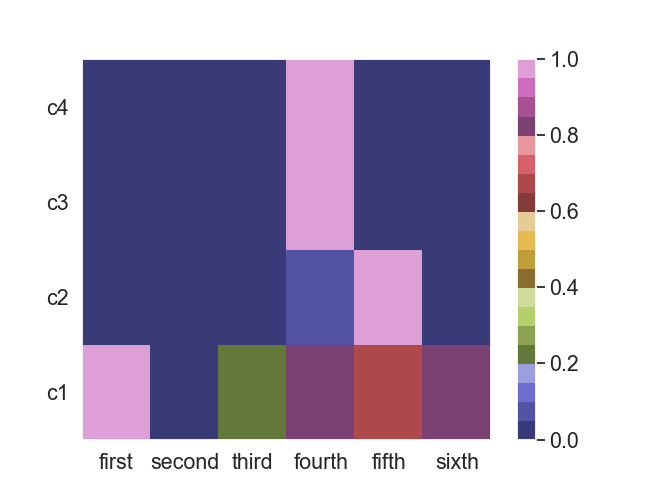

In [150]:

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
X = X
columns = ["first", "second", "third",
           "fourth", "fifth", "sixth"]
index = ["c1","c2","c3","c4"]
plt.pcolor(X,cmap = 'tab20b')
plt.yticks(np.arange(0.5, len(index), 1), index,fontsize = 15)
plt.xticks(np.arange(0.5, len(columns), 1), columns,fontsize = 15)
plt.colorbar()

fig = plt.gcf()
cbar_ax = fig.axes[-1]
cbar_ax.tick_params(labelsize=15)
plt.show()
plt.savefig("Unlabelled- Heatmap_c1.png", bbox_inches='tight')

<IPython.core.display.Javascript object>


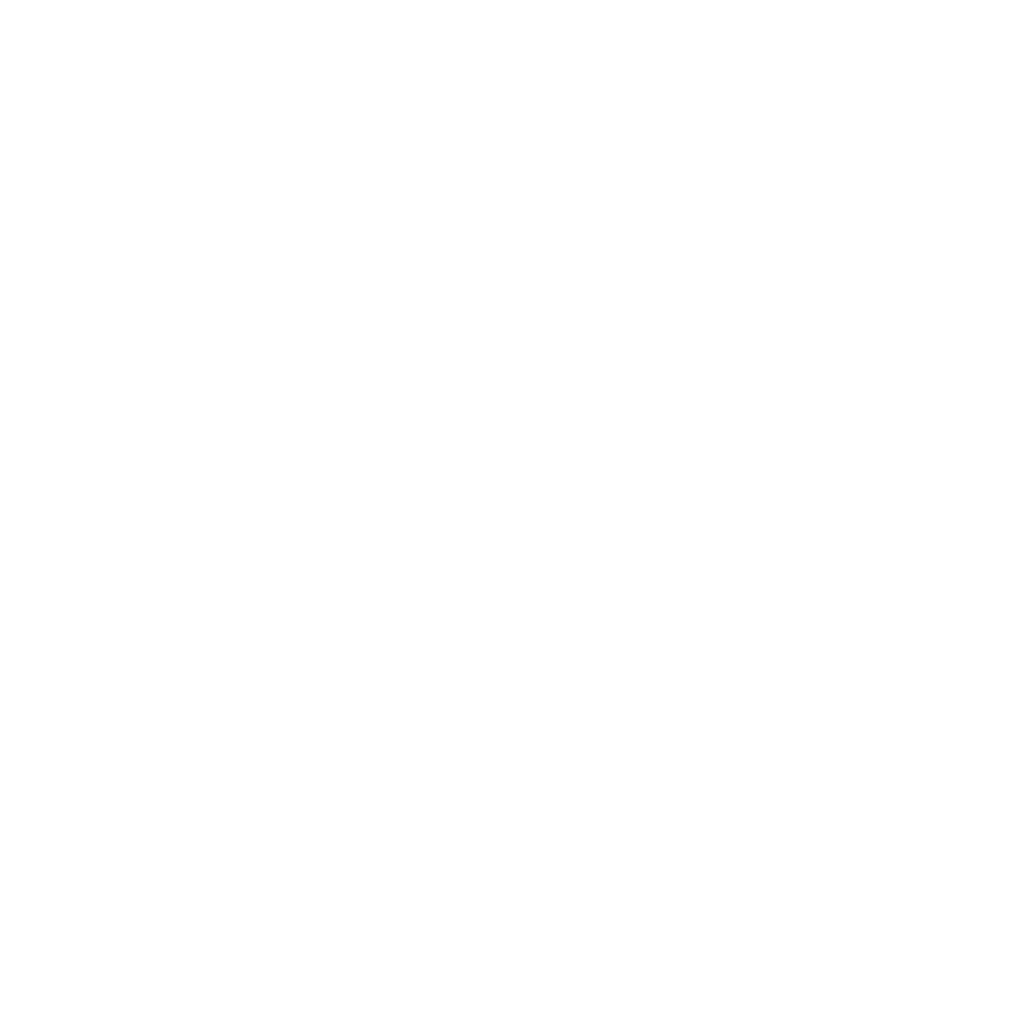

In [46]:
import scipy
c1_zscore= scipy.stats.zscore(heat_map_c1, axis = 0)
c2_zscore= scipy.stats.zscore(heat_map_c2, axis = 0)
c3_zscore= scipy.stats.zscore(heat_map_c3, axis = 0)
c4_zscore= scipy.stats.zscore(heat_map_c4, axis = 0)
X_zscore = pd.DataFrame({'c1': c1_zscore, 'c2':c2_zscore,'c3': c3_zscore,'c4': c4_zscore})
name = ['1','2','3','4','5','6']
X_zscore['Name'] = name
X_zscore = X_zscore.set_index('Name')
del X_zscore.index.name

cbar_kws = {"shrink":1}
# Cluster map without standardisation
# fig = plt.figure()
sns.set(font_scale=0.8)
g = sns.clustermap(X_zscore,cmap="viridis")

plt.savefig('clustermap_in.png',format='png', dpi=1200)
#PLease replace colours with 'w'

my_colors = ['c', 'b', 'r', 'r', 'g', 'k', 'b']

# for ticklabel, tickcolor in zip(g.ax_heatmap.axes.get_yticklabels(), my_colors):
#     ticklabel.set_color(tickcolor)

# for ticklabel, tickcolor in zip(g.ax_heatmap.axes.get_xticklabels(), my_colors):
#     ticklabel.set_color(tickcolor)

# hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
#Cluster map with Standardisation
#sns.clustermap(X_zscore,standard_scale = 1,cmap="viridis")

In [47]:
os.chdir(results_store_path)

<IPython.core.display.Javascript object>


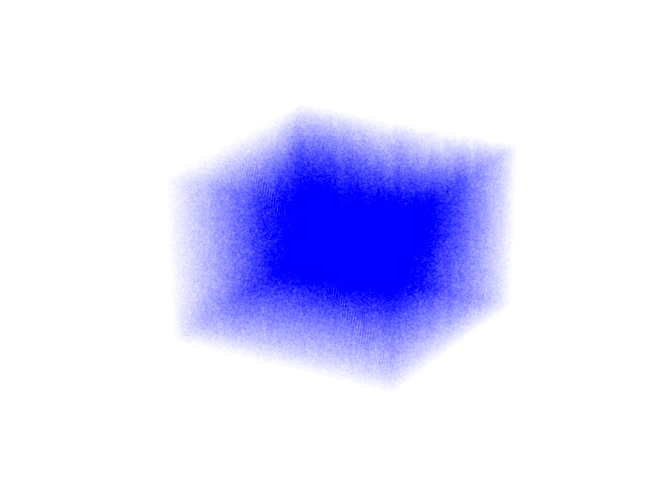

In [137]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = zero_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = 'blue' , alpha= 0.3 ,s = 0.00004 )
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_0_in.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


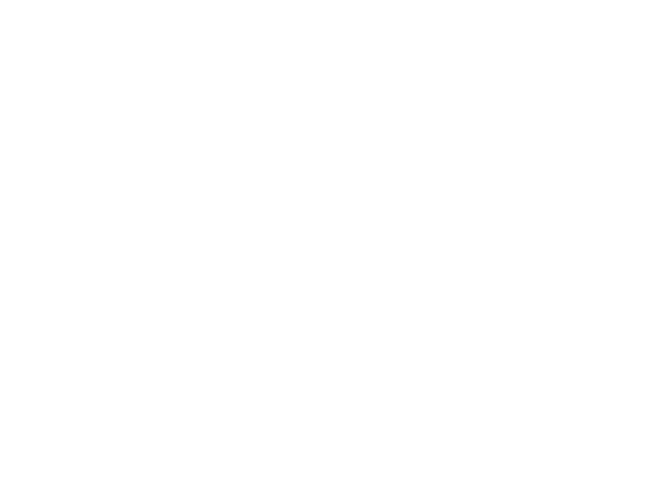

In [49]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = one_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = 'green' , alpha= 0.1 ,s = 0.005)

# # First remove fill
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
# ax.grid(False)
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:


# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_1_in.png", bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


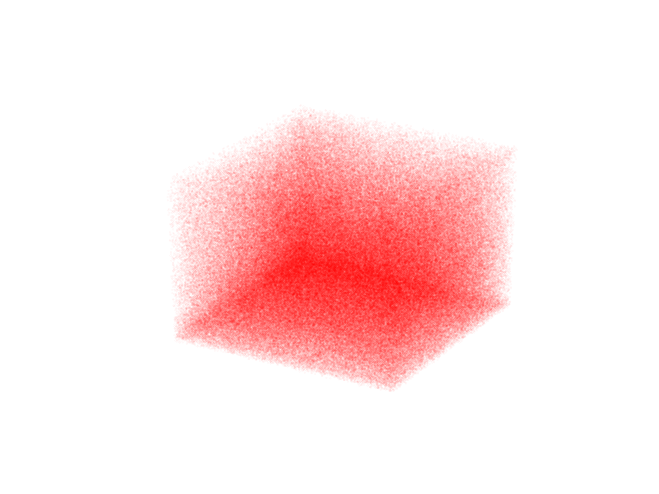

In [139]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = two_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = 'red' , alpha= 0.2,s = 0.006
                  )



# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# # Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# # Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_2_in.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


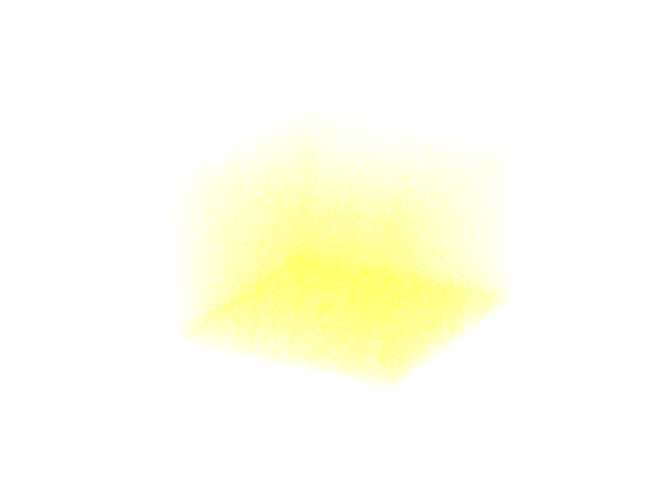

In [155]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = three_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = 'yellow' , alpha= 0.2 ,s = 0.001)

# fig.colorbar(img)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig("cluster_3_in.png", bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


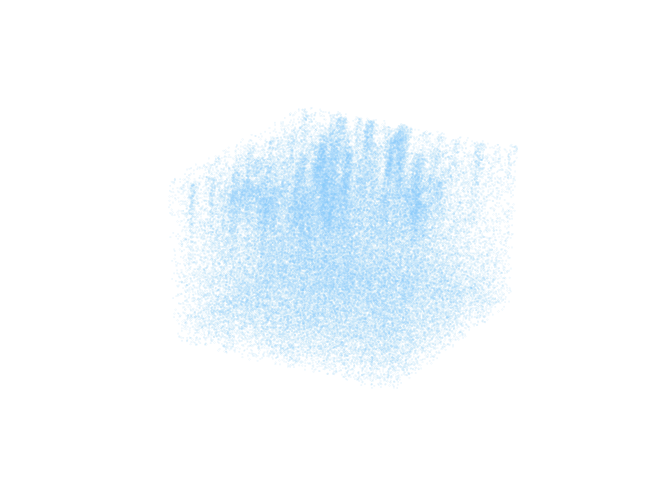

In [144]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = four_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = '#87CEFA' , alpha= 0.7 ,s = 0.009)

#fig.colorbar(img)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_4_in.png", bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


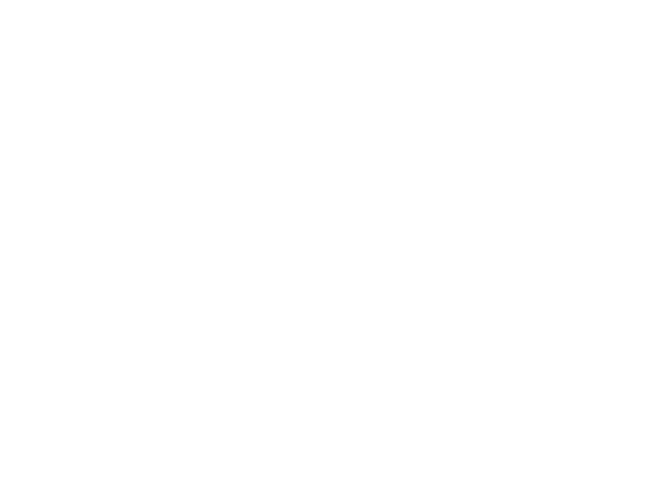

In [53]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

array = five_array
img = ax.scatter3D(array[:,0],array[:,1],array[:,2], c = '#20B2AA' , alpha= 0.1 ,s = 0.02)

#fig.colorbar(img)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("cluster_5_in.png", bbox_inches='tight')

plt.show()

In [54]:
x_list = px[c1]
y_list = py[c1]
z_list = pz[c1]

<IPython.core.display.Javascript object>


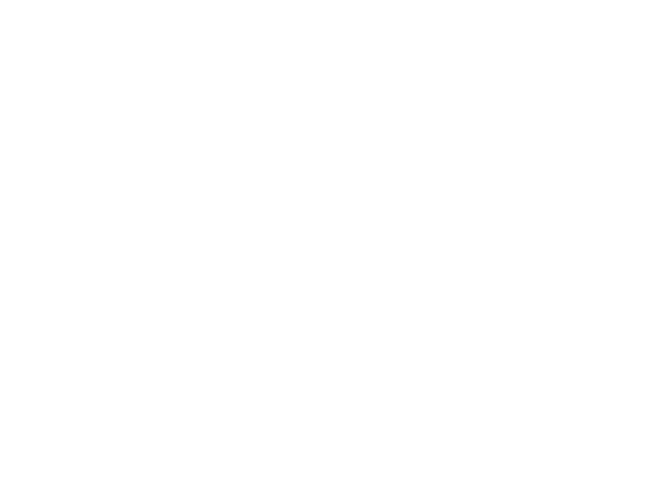

In [55]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cluster = one_indices
c = final_c1_one

img = ax.scatter3D([x_list[i] for i in cluster],[y_list[i] for i in cluster],[z_list[i] for i in cluster],c = c ,alpha= 1, cmap='cool',s = 0.1)

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig("final_c1_one_in.png", bbox_inches='tight')
plt.show()

In [56]:
os.chdir(results_store_path)

# Plotting Overlap of clusters and Original Compounds

In [57]:
x_list = px[c1]
y_list = py[c1]
z_list = pz[c1]
[x_list[i] for i in cluster]

[0.0,
 1.0,
 2.0,
 4.0,
 5.0,
 7.0,
 9.0,
 10.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 58.0,
 60.0,
 63.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 90.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 115.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 150.0,
 152.0,
 153.0,
 154.0,
 156.0,
 157.0,
 158.0,
 159.0,
 160.0,
 1

<IPython.core.display.Javascript object>


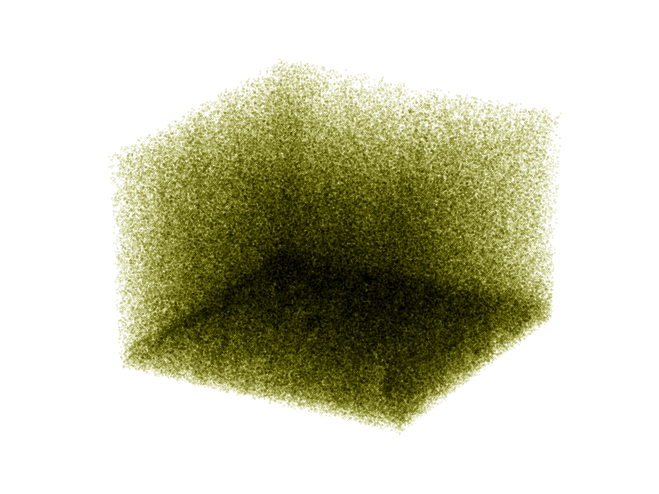

In [135]:
fig = plt.figure()
ax = Axes3D(fig) 
cluster = three_indices
c = final_c4_three

x_list= px[c1]
y_list= py[c1]
z_list = pz[c1]

p = wow_c4_3

ax.scatter3D([x_list[i] for i in cluster],[y_list[i] for i in cluster],[z_list[i] for i in cluster],c,s = 0.03,color = 'yellow', alpha = 0.3)
ax.scatter3D(p[:,0], p[:,1], p[:,2],s = 0.005,color = "black", alpha = 0.5)

#'#FF1493'
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

# fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])

plt.savefig("final_c4_3_in.png", bbox_inches='tight')
plt.show()

In [59]:
def compute_cluster_pixels(px,py,pz,pv,c1,zero_array,pixel_zero_c1):
    A = np.c_[px[c1],py[c1],pz[c1]]
    B = zero_array
    coord_list = [tuple(c) for c in A]
    coord_subs = [tuple(c) for c in B]
    pixel_dict = {}
    for coord in coord_list:
        pixel_dict[coord] = 0
    for i, coord in enumerate(coord_subs):
        pixel_dict[coord] = pixel_zero_c1[i]
    return list(pixel_dict.values())

In [69]:
re_pixel_zero_c1 = compute_cluster_pixels(px,py,pz,pv,c1,zero_array,pixel_zero_c1)
re_pixel_zero_c2 = compute_cluster_pixels(px,py,pz,pv,c2,zero_array,pixel_zero_c2)#
re_pixel_zero_c3 = compute_cluster_pixels(px,py,pz,pv,c3,zero_array,pixel_zero_c3)#
re_pixel_zero_c4 = compute_cluster_pixels(px,py,pz,pv,c4,zero_array,pixel_zero_c4)#

In [70]:
re_pixel_one_c1 = compute_cluster_pixels(px,py,pz,pv,c1,one_array,pixel_one_c1)
re_pixel_one_c2 = compute_cluster_pixels(px,py,pz,pv,c2,one_array,pixel_one_c2)
re_pixel_one_c3 = compute_cluster_pixels(px,py,pz,pv,c3,one_array,pixel_one_c3)
re_pixel_one_c4 = compute_cluster_pixels(px,py,pz,pv,c4,one_array,pixel_one_c4)

In [71]:
re_pixel_two_c1 = compute_cluster_pixels(px,py,pz,pv,c1,two_array,pixel_two_c1)
re_pixel_two_c2 = compute_cluster_pixels(px,py,pz,pv,c2,two_array,pixel_two_c2)
re_pixel_two_c3 = compute_cluster_pixels(px,py,pz,pv,c3,two_array,pixel_two_c3)
re_pixel_two_c4 = compute_cluster_pixels(px,py,pz,pv,c4,two_array,pixel_two_c4)

In [72]:
re_pixel_three_c1 = compute_cluster_pixels(px,py,pz,pv,c1,three_array,pixel_three_c1)
re_pixel_three_c2 = compute_cluster_pixels(px,py,pz,pv,c2,three_array,pixel_three_c2)
re_pixel_three_c3 = compute_cluster_pixels(px,py,pz,pv,c3,three_array,pixel_three_c3)
re_pixel_three_c4 = compute_cluster_pixels(px,py,pz,pv,c4,three_array,pixel_three_c4)

In [73]:
re_pixel_four_c1 = compute_cluster_pixels(px,py,pz,pv,c1,four_array,pixel_four_c1)
re_pixel_four_c2 = compute_cluster_pixels(px,py,pz,pv,c2,four_array,pixel_four_c2)
re_pixel_four_c3 = compute_cluster_pixels(px,py,pz,pv,c3,four_array,pixel_four_c3)
re_pixel_four_c4 = compute_cluster_pixels(px,py,pz,pv,c4,four_array,pixel_four_c4)

In [74]:
re_pixel_five_c1 = compute_cluster_pixels(px,py,pz,pv,c1,five_array,pixel_five_c1)
re_pixel_five_c2 = compute_cluster_pixels(px,py,pz,pv,c2,five_array,pixel_five_c2)
re_pixel_five_c3 = compute_cluster_pixels(px,py,pz,pv,c3,five_array,pixel_five_c3)
re_pixel_five_c4 = compute_cluster_pixels(px,py,pz,pv,c4,five_array,pixel_five_c4)

In [75]:
scipy.spatial.distance.correlation(pv[c1],re_pixel_five_c1)

0.7532631224177535

In [76]:
from sklearn.metrics import f1_score

# Displaying Metrics

In [77]:
f1_score(pv[c1], re_pixel_zero_c1, average='macro')

0.9510394762306156

In [78]:
f1_score(pv[c1], re_pixel_one_c1, average='macro')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.10004124761697161

In [79]:
f1_score(pv[c1], re_pixel_two_c1, average='macro')

0.10004522403117985

In [80]:
f1_score(pv[c1], re_pixel_three_c1, average='macro')

0.14400150574942902

In [81]:
f1_score(pv[c1], re_pixel_four_c1, average='macro')

0.1080472644402842

In [82]:
f1_score(pv[c1], re_pixel_five_c1, average='macro')

0.20730430596670738

In [83]:
f1_score(pv[c2], re_pixel_zero_c2, average='macro')

0.19931584066581837

In [84]:
f1_score(pv[c2], re_pixel_one_c2, average='macro')

0.19931584066581837

In [85]:
f1_score(pv[c2], re_pixel_two_c2, average='macro')

0.19931584066581837

In [86]:
f1_score(pv[c2], re_pixel_three_c2, average='macro')

0.19933373403827098

In [87]:
f1_score(pv[c2], re_pixel_four_c2, average='macro')

0.9999955035638599

In [88]:
f1_score(pv[c2], re_pixel_five_c2, average='macro')

0.19931584066581837

In [89]:
f1_score(pv[c3], re_pixel_zero_c3, average='macro')

0.16043569052231305

In [90]:
f1_score(pv[c3], re_pixel_one_c3, average='macro')

0.16039443478056767

In [91]:
f1_score(pv[c3], re_pixel_two_c3, average='macro')

0.8418877110853193

In [92]:
f1_score(pv[c3], re_pixel_three_c3, average='macro')

0.18448406491831248

In [93]:
f1_score(pv[c3], re_pixel_four_c3, average='macro')

0.16785341246279306

In [94]:
f1_score(pv[c3], re_pixel_five_c3, average='macro')

0.4951355916294402

In [95]:
f1_score(pv[c4], re_pixel_zero_c4, average='macro')

0.1632538526680711

In [96]:
f1_score(pv[c4], re_pixel_one_c4, average='macro')

0.16285281428933168

In [97]:
f1_score(pv[c4], re_pixel_two_c4, average='macro')

0.16493586163519777

In [98]:
f1_score(pv[c4], re_pixel_three_c4, average='macro')

0.997665201486353

In [99]:
f1_score(pv[c4], re_pixel_four_c4, average='macro')

0.16735948942370724

In [100]:
f1_score(pv[c4], re_pixel_five_c4, average='macro')

0.1648706764429963

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pv[c5], re_pixel_five_c5))